In [8]:
# Generative Adversarial Network(GAN)을 구현
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#######
# 옵션 설정
#######
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128 # 생성기의 입력값으로 사용할 노이즈의 크기

In [4]:
#######
# 신경망 모델 구성
#######
# 입력값은 X만 사용
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈 Z를 입력값으로 사용
Z = tf.placeholder(tf.float32, [None, n_noise])

# Generator에 사용하는 변수 
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# Discriminator 에 사용하는 변수
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# Discriminator 의 최종 결과값은 얼마나 진짜에 가깝냐를 판단
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [5]:
# 생성기(Generator) 신경망 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

# 판별기(D) 신경망을 구성
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

# 랜덤한 노이즈(Z)를 만듭니다.
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [6]:
# 노이즈를 이용해 랜덤한 이미지 생성
G = generator(Z)
# 노이즈를 이용한 이미지가 진짜 인지 판별
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별
D_real = discriminator(X)

In [7]:
# GAN 모델의 최적화는 loss_G와 loss_D를 최대화 하는 것(= 각각 0.5)
# loss_D를 최대화 하기 위해서는 D_gene값을 최소화
# 판별기에 진짜 이미지를 넣었을 때 최대값 : tf.log(D_real)
# 가짜 이미지를 넣었을때 최대값 : tf.log(1-D_gene)
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene))

# loss_G를 최대화하기 위해 D_gene 값을 최대화 하게 됨.
# 가짜 이미지를 넣었을 때, 판별기가 최대한 실제 이미지라고 판단하도록 생성기 신경망을 학습
loss_G = tf.reduce_mean(tf.log(D_gene))

# loss_D를 구할 때는 생성기 신경망에 사용되는 변수만 사용
# logg_G를 구할 때는 판별기 신경망에 사용되는 변수만 사용
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# GAN 논문에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D와 loss_G 에 음수 부호를 붙여줌
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list = D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list = G_var_list)

Epoch: 0000 D loss : -0.3974 G_loss : -2.116


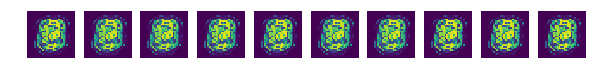

Epoch: 0001 D loss : -0.3047 G_loss : -2.333
Epoch: 0002 D loss : -0.276 G_loss : -2.349
Epoch: 0003 D loss : -0.4248 G_loss : -1.616
Epoch: 0004 D loss : -0.3921 G_loss : -2.135
Epoch: 0005 D loss : -0.4884 G_loss : -2.161
Epoch: 0006 D loss : -0.2475 G_loss : -2.607
Epoch: 0007 D loss : -0.4426 G_loss : -2.266
Epoch: 0008 D loss : -0.3649 G_loss : -2.158
Epoch: 0009 D loss : -0.5625 G_loss : -1.693


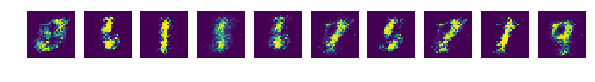

Epoch: 0010 D loss : -0.4106 G_loss : -2.239
Epoch: 0011 D loss : -0.4131 G_loss : -2.205
Epoch: 0012 D loss : -0.3418 G_loss : -2.38
Epoch: 0013 D loss : -0.2218 G_loss : -2.568
Epoch: 0014 D loss : -0.4609 G_loss : -2.377
Epoch: 0015 D loss : -0.3836 G_loss : -2.294
Epoch: 0016 D loss : -0.2455 G_loss : -3.036
Epoch: 0017 D loss : -0.3298 G_loss : -2.65
Epoch: 0018 D loss : -0.3815 G_loss : -2.685
Epoch: 0019 D loss : -0.3055 G_loss : -3.149


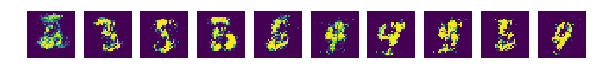

Epoch: 0020 D loss : -0.2906 G_loss : -3.178
Epoch: 0021 D loss : -0.2825 G_loss : -2.837
Epoch: 0022 D loss : -0.5373 G_loss : -2.413
Epoch: 0023 D loss : -0.429 G_loss : -2.965
Epoch: 0024 D loss : -0.4844 G_loss : -2.521
Epoch: 0025 D loss : -0.5306 G_loss : -2.294
Epoch: 0026 D loss : -0.2783 G_loss : -3.255
Epoch: 0027 D loss : -0.453 G_loss : -2.894
Epoch: 0028 D loss : -0.3978 G_loss : -2.615
Epoch: 0029 D loss : -0.3586 G_loss : -2.661


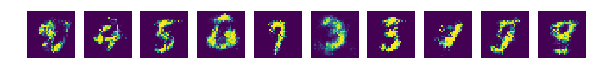

Epoch: 0030 D loss : -0.4719 G_loss : -2.812
Epoch: 0031 D loss : -0.4125 G_loss : -2.448
Epoch: 0032 D loss : -0.5058 G_loss : -2.558
Epoch: 0033 D loss : -0.5082 G_loss : -2.443
Epoch: 0034 D loss : -0.5426 G_loss : -2.719
Epoch: 0035 D loss : -0.543 G_loss : -2.204
Epoch: 0036 D loss : -0.4665 G_loss : -2.396
Epoch: 0037 D loss : -0.7195 G_loss : -2.215
Epoch: 0038 D loss : -0.51 G_loss : -2.371
Epoch: 0039 D loss : -0.6339 G_loss : -2.33


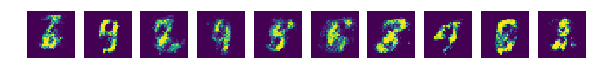

Epoch: 0040 D loss : -0.5813 G_loss : -2.217
Epoch: 0041 D loss : -0.7228 G_loss : -1.932
Epoch: 0042 D loss : -0.8198 G_loss : -2.128
Epoch: 0043 D loss : -0.5518 G_loss : -2.309
Epoch: 0044 D loss : -0.6734 G_loss : -2.235
Epoch: 0045 D loss : -0.5337 G_loss : -2.215
Epoch: 0046 D loss : -0.6496 G_loss : -2.353
Epoch: 0047 D loss : -0.6825 G_loss : -2.287
Epoch: 0048 D loss : -0.7735 G_loss : -2.129
Epoch: 0049 D loss : -0.5386 G_loss : -2.223


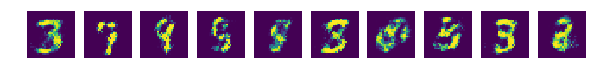

Epoch: 0050 D loss : -0.6718 G_loss : -1.962
Epoch: 0051 D loss : -0.7116 G_loss : -2.042
Epoch: 0052 D loss : -0.7421 G_loss : -1.975
Epoch: 0053 D loss : -0.7224 G_loss : -2.045
Epoch: 0054 D loss : -0.6062 G_loss : -1.913
Epoch: 0055 D loss : -0.6849 G_loss : -2.073
Epoch: 0056 D loss : -0.7646 G_loss : -2.032
Epoch: 0057 D loss : -0.7005 G_loss : -1.85
Epoch: 0058 D loss : -0.7584 G_loss : -1.776
Epoch: 0059 D loss : -0.7053 G_loss : -1.989


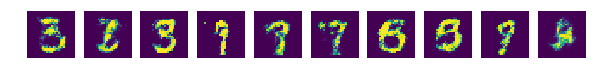

Epoch: 0060 D loss : -0.6301 G_loss : -2.02
Epoch: 0061 D loss : -0.7741 G_loss : -2.012
Epoch: 0062 D loss : -0.9769 G_loss : -1.983
Epoch: 0063 D loss : -0.7524 G_loss : -1.808
Epoch: 0064 D loss : -0.9263 G_loss : -1.681
Epoch: 0065 D loss : -0.8604 G_loss : -1.722
Epoch: 0066 D loss : -0.872 G_loss : -1.732
Epoch: 0067 D loss : -0.8911 G_loss : -1.598
Epoch: 0068 D loss : -0.7303 G_loss : -1.732
Epoch: 0069 D loss : -0.8374 G_loss : -1.673


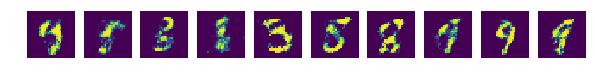

Epoch: 0070 D loss : -0.9138 G_loss : -1.887
Epoch: 0071 D loss : -0.8502 G_loss : -1.561
Epoch: 0072 D loss : -0.8151 G_loss : -1.673
Epoch: 0073 D loss : -0.7796 G_loss : -1.851
Epoch: 0074 D loss : -0.7207 G_loss : -1.838
Epoch: 0075 D loss : -0.7391 G_loss : -1.773
Epoch: 0076 D loss : -0.7587 G_loss : -1.659
Epoch: 0077 D loss : -0.912 G_loss : -1.71
Epoch: 0078 D loss : -0.7581 G_loss : -1.771
Epoch: 0079 D loss : -0.8415 G_loss : -1.88


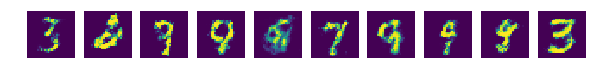

Epoch: 0080 D loss : -0.7347 G_loss : -1.751
Epoch: 0081 D loss : -0.7787 G_loss : -1.761
Epoch: 0082 D loss : -0.6467 G_loss : -1.849
Epoch: 0083 D loss : -0.9198 G_loss : -1.682
Epoch: 0084 D loss : -0.8154 G_loss : -1.994
Epoch: 0085 D loss : -0.762 G_loss : -1.683
Epoch: 0086 D loss : -0.915 G_loss : -1.484
Epoch: 0087 D loss : -0.7721 G_loss : -1.643
Epoch: 0088 D loss : -0.9879 G_loss : -1.613
Epoch: 0089 D loss : -0.854 G_loss : -1.732


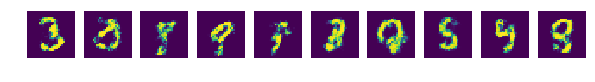

Epoch: 0090 D loss : -0.6643 G_loss : -2.127
Epoch: 0091 D loss : -0.717 G_loss : -1.824
Epoch: 0092 D loss : -0.8571 G_loss : -1.687
Epoch: 0093 D loss : -0.9121 G_loss : -1.578
Epoch: 0094 D loss : -0.7426 G_loss : -1.669
Epoch: 0095 D loss : -0.768 G_loss : -1.854
Epoch: 0096 D loss : -0.8244 G_loss : -1.956
Epoch: 0097 D loss : -0.8575 G_loss : -1.567
Epoch: 0098 D loss : -0.7154 G_loss : -1.765
Epoch: 0099 D loss : -0.8653 G_loss : -1.594


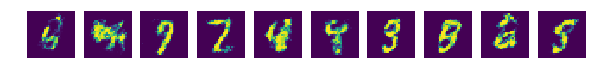

최적화완료


In [13]:
#######
# 신경망 모델 학습
#######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        # 판별기와 생성기 신경망을 각각 학습
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})
        
    print('Epoch:', '%04d' %epoch, 'D loss : {:.4}'.format(loss_val_D), 'G_loss : {:.4}'.format(loss_val_G))
    
    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

#         plt.savefig('./samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
#         plt.close(fig)
        plt.show(fig)
        
print('최적화완료')